# 数据的解析与获取3

Xpath是在XMl文档中搜索内容的一门语言。

html是xml的一个子集。

XML例子如下：

In [ ]:
<library>
    <book id="1">
        <title>红楼梦</title>
        <author>曹雪芹</author>
        <publicationInfo>
            <publisher>人民文学出版社</publisher>
            <publicationDate>1973-08</publicationDate>
        </publicationInfo>
        <category>
            <classification>小说</classification>
            <subClassification>古典文学</subClassification>
        </category>
    </book>
    <book id="2">
        <title>三国演义</title>
        <author>罗贯中</author>
        <publicationInfo>
            <publisher>中华书局</publisher>
            <publicationDate>1953-09</publicationDate>
        </publicationInfo>
        <category>
            <classification>历史</classification>
            <subClassification>文学</subClassification>
        </category>
    </book>
</library>


## 1、安装模块lxml
`pip install lxml`

## 2、认识xpath
注意xpath只能处理标签是英文的

In [13]:
from lxml import etree

xml = """<library>
    <book id="1">
        <title>红楼梦</title>
        <author>曹雪芹</author>
        <publicationInfo>
            <publisher>人民文学出版社</publisher>
            <publicationDate>1973-08</publicationDate>
        </publicationInfo>
        <category>
            <classification>小说</classification>
            <subClassification>古典文学</subClassification>
        </category>
    </book>
    <book id="2">
        <title>三国演义</title>
        <author>罗贯中</author>
        <publicationInfo>
            <publisher>中华书局</publisher>
            <publicationDate>1953-09</publicationDate>
        </publicationInfo>
        <category>
            <classification>历史</classification>
            <subClassification>文学</subClassification>
        </category>
    </book>
</library>

"""

tree = etree.XML(xml)

# /表示层级关系，第一个/是根结点，//data表示这个标签下的所有data即使你是隐藏在/book/data下
# text拿文本。
# 、* 是通配符，谁都行的意思。
result = tree.xpath("/library/book/title/text()")

print(result)

['红楼梦', '三国演义']


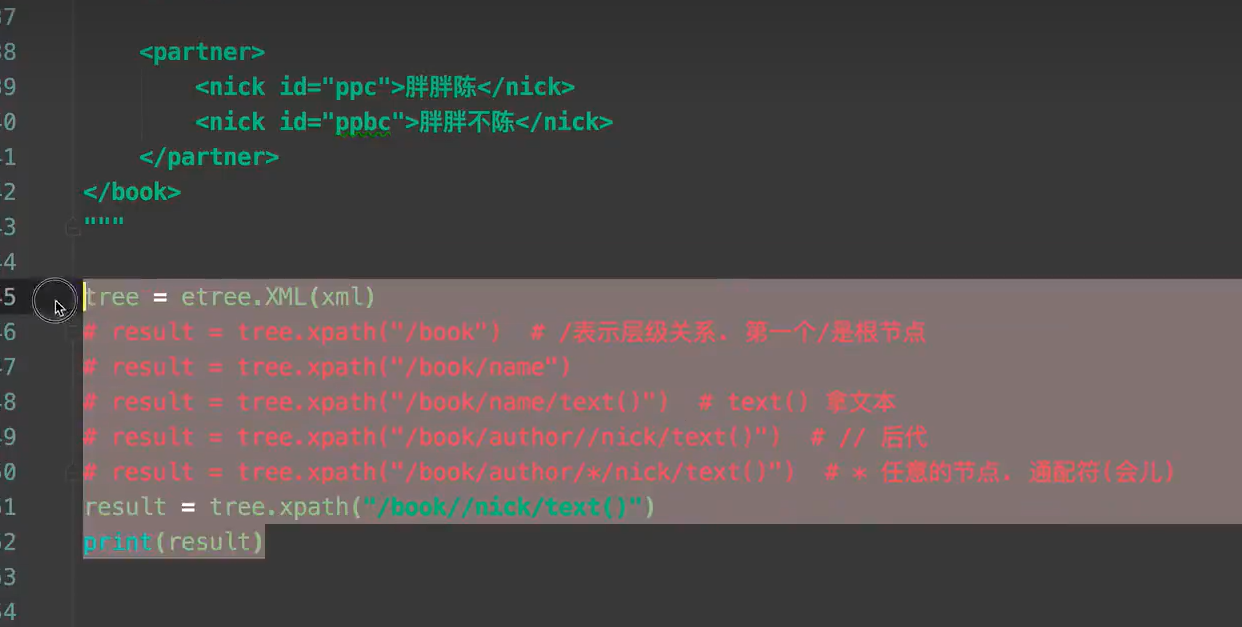
可以去训练，我就不详细说了，实战出真知即可。
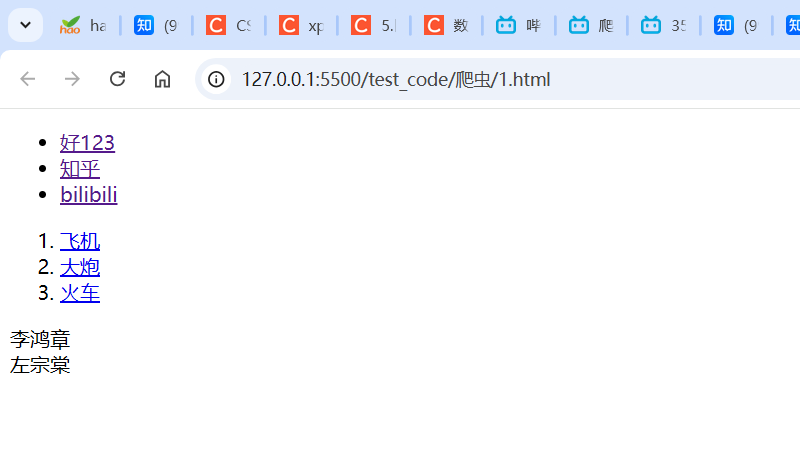

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <!-- <meta charset="UTF-8"> -->
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Document</title>
</head>
<body>
    <ul>
        <li><a href="https://www.hao123.com/">好123</a></li>
        <li><a href="https://www.zhihu.com/">知乎</a></li>
        <li><a href="https://www.bilibili.com/">bilibili</a></li>
    </ul>
    <ol>
        <li><a href="feiji">飞机</a></li>
        <li><a href="dapao">大炮</a></li>
        <li><a href="huoche">火车</a></li>
    </ol>
    <div class="lhz">李鸿章</div>
    <div class="zzt">左宗棠</div>
</body>
</html>

In [17]:
from lxml import etree

html = """<!DOCTYPE html>
<html lang="en">
<head>
    <!-- <meta charset="UTF-8"> -->
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Document</title>
</head>
<body>
    <ul>
        <li><a href="https://www.hao123.com/">好123</a></li>
        <li><a href="https://www.zhihu.com/">知乎</a></li>
        <li><a href="https://www.bilibili.com/">bilibili</a></li>
    </ul>
    <ol>
        <li><a href="feiji">飞机</a></li>
        <li><a href="dapao">大炮</a></li>
        <li><a href="huoche">火车</a></li>
    </ol>
    <div class="lhz">李鸿章</div>
    <div class="zzt">左宗棠</div>
</body>
</html>
"""


tree = etree.HTML(html)

# xpath的顺序是从1开始数的，[]表示索引。
result = tree.xpath("/html/body/ul/li[1]/a/text()")

result

['好123']

In [19]:
# [@xxx=xxx]是筛选。
result = tree.xpath("/html/body/ol/li/a[@href='dapao']/text()")
result

['大炮']

In [21]:
# 有相对路径和绝对路径之说。
result = tree.xpath("/html/body/ol/li/a/text()")
for a in result:
    print(a)

result = tree.xpath("/html/body/ol/li")
for li in result:
    print(li.xpath("./a/text()"))

飞机
大炮
火车
['飞机']
['大炮']
['火车']


In [22]:
# 获取属性加@
result = tree.xpath("/html/body/ol/li")
for li in result:
    print(li.xpath("./a/@href"))

['feiji']
['dapao']
['huoche']


如果页面特别复杂，而我只想要李鸿章。
我们可以F12去查找。
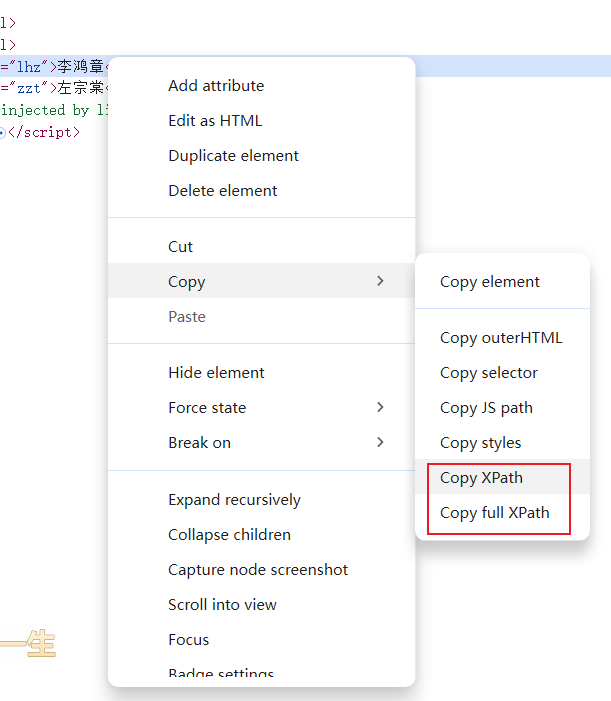

In [24]:
# 如果页面特别复杂，而我只想要李鸿章。
print(tree.xpath('/html/body/div[1]/text()'))
print(tree.xpath('/html/body/ol/li[2]/a/text()'))

['李鸿章']
['大炮']


# 3、实战：抓取猪八戒网信息。
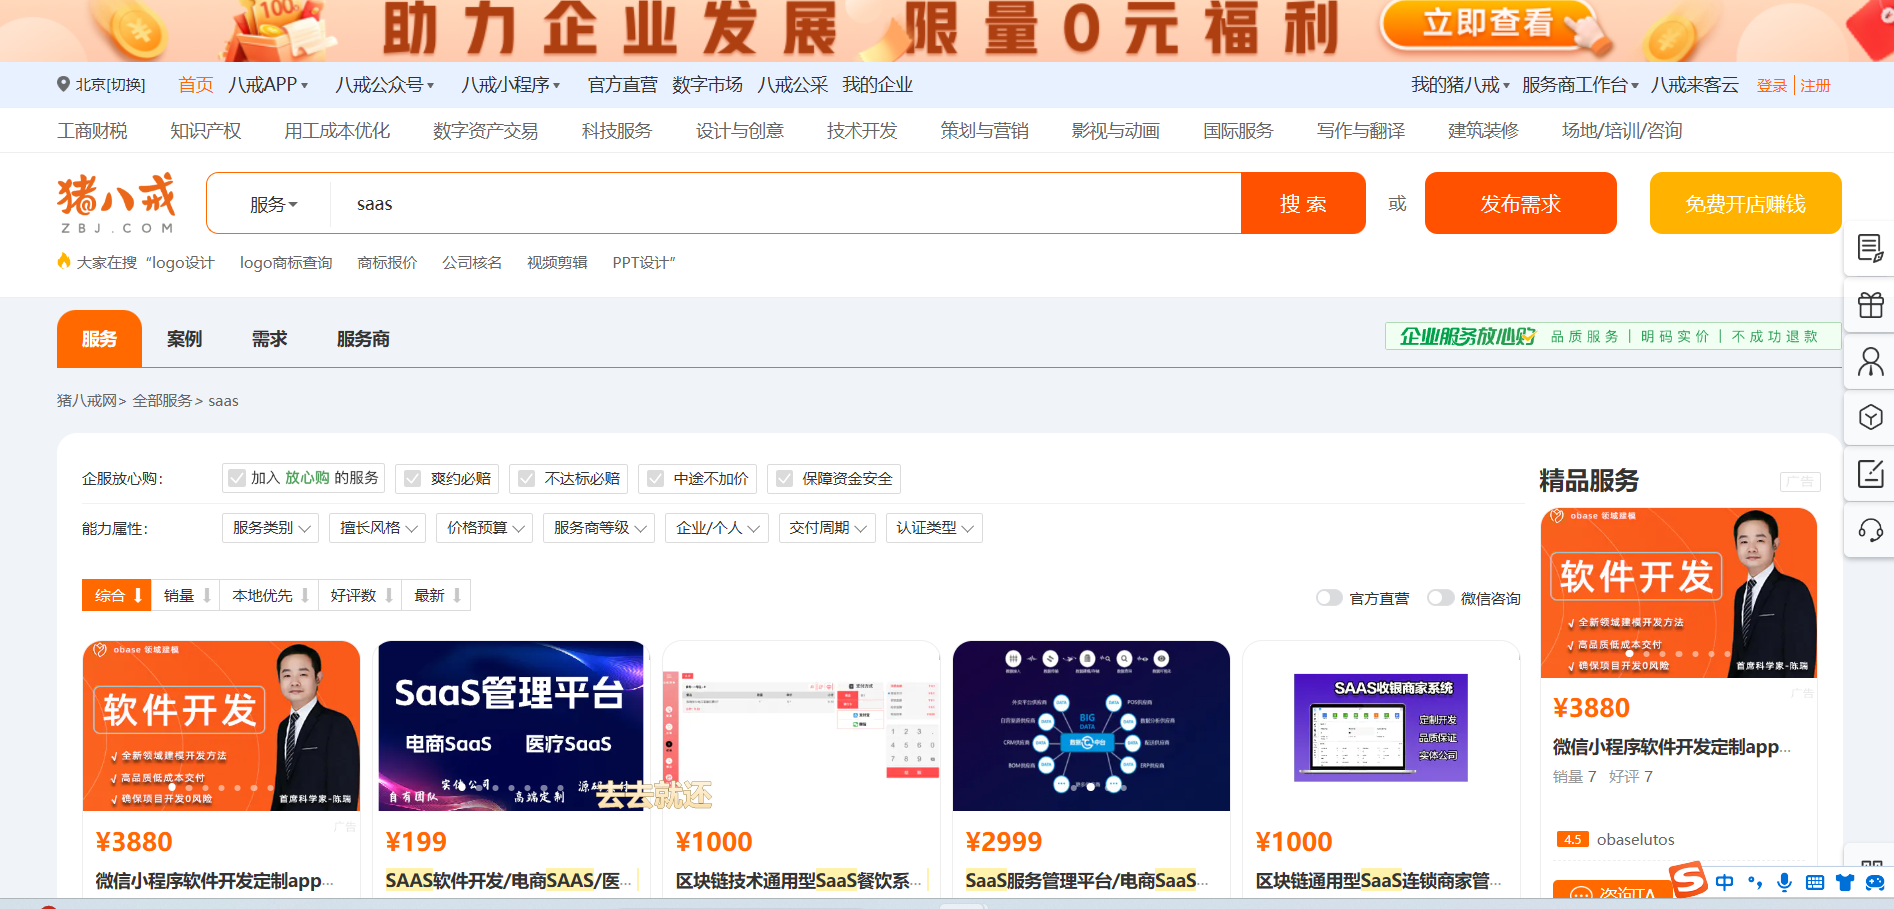
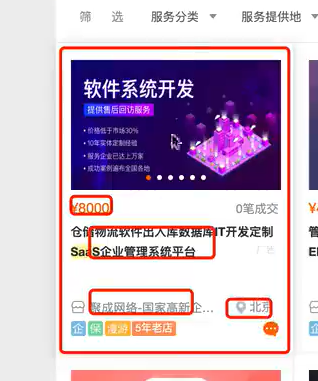
我们提取这几样内容。
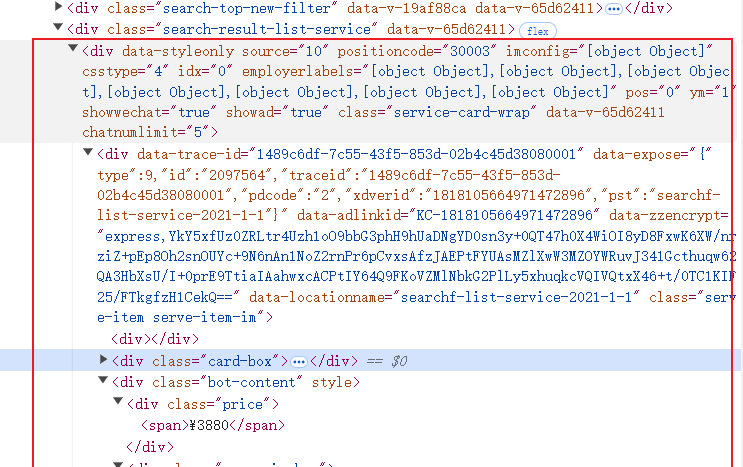
从这下面是一整块的内容。

In [57]:
import requests
from lxml import etree

# 定义一个函数用来获取网页源代码
def getSource(pagelink):

    headers = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36"
    }

    resp = requests.get(url, headers=headers)
    resp.encoding = 'utf-8'
    html = resp.text

    resp.close()
    return html

# 定义一个函数用于解析我们的网页源代码并获取我们想要的数据
def getContent(html):
    tree = etree.HTML(html)
    data = tree.xpath('//*[@id="__layout"]/div/div[3]/div/div[4]/div/div[2]/div[1]/div[2]/div')

    # //*[@id="__layout"]/div/div[3]/div/div[4]/div/div[2]/div[1]/div[2]/div[1]/div/div[3]/div[1]/span
    # //*[@id="__layout"]/div/div[3]/div/div[4]/div/div[2]/div[1]/div[2]/div[2]/div/div[3]/div[1]/span
    # //*[@id="__layout"]/div/div[3]/div/div[4]/div/div[2]/div[1]/div[2]/div[5]/div/div[3]/div[1]/span
    # //*[@id="__layout"]/div/div[3]/div[1]/div[4]/div/div[2]/div/div[2]/div[6]/div/div[5]/div/div/span
    # //*[@id="__layout"]/div/div[3]/div[1]/div[4]/div/div[2]/div/div[2]/div[2]/div/div[5]/div/div/span

    for i in data:
        price = i.xpath("./div/div[3]/div[1]/span/text()")
        name = ['/'.join(i.xpath("./div/div[3]/div[2]/a/span//text()"))]
        shop = i.xpath("./div/div[5]/div/div/div/text()")
        print(price + name + shop)

    return 0

if __name__ == '__main__':
    url = "https://www.zbj.com/fw/?k=saas"
    html = getSource(url)
    itemlist = getContent(html)
    # print(itemlist)


['¥199', 'SAAS/软件开发/电商/SAAS//医疗/SAAS', '帮利智能科技-10年系统开发']
['¥1000', '区块链技术通用型/SaaS/餐饮系统/SaaS/收银商家管理', '焕链科技-专业区块链服务商']
['¥2999', 'SaaS/服务管理平台/电商/SaaS/平台/医疗/SaaS/平台', '帮利智能科技-10年系统开发']
['¥1000', '区块链通用型/SaaS/连锁商家管理餐饮/SaaS/服务', '焕链科技-专业区块链服务商']
['¥3000', 'SAAS/微信小程序会员分销商城招聘直播点餐预约', '南京捷创科技']
['¥106', '小程序定制/企业管理/会员商城/saas/服务', '元恒信息']
['¥2000', 'SAAS/微信小程序会员分销商城招聘直播点餐预约', '南京捷创科技']
['¥6800', '快速部署-社交电商系统，/saas/交付/源码交付', '慧科盈商']
['¥1288', 'saas/微信公众号小程序商城H5python开发', '千界科技-国家高新企业十年店']
['¥15800', 'saas/微信公众号小程序商城H5python开发', '千界网络']
['¥5000', '物联网系统定制软件硬件应用开发/SAAS/平台安卓', '名锐讯动-500强合作商']
['¥1680', 'SAAS/微信公众号小程序开发会员分销商城点餐预约', '匠派品牌']
['¥380', '系统界面软件ui后台管理网页设计/saas/设计erp设计网站', '千红视觉']
['¥8000', '企业协同软件开发管理系统/SaaS/进销存客户定制', '天迅达科技-国家高新技术企业']
['¥1000', 'OA办公企业管理餐饮电商教育培训/SaaS/系统定制', '木风科技-国家高新企业15年店']
['¥103', '商城APP开发教育医疗代驾家政外卖/SAAS/定制作', '慧族网络19年实体百人开发团队']
['¥100', '管理软件界面区块链ui进销存/saas/界面ERP设计办公', '千红视觉']
['¥100', 'SAAS/系统研发OA办公财务通信系统企业管理软件定制开发', '迷古科技-斩获上海市科技成果一等奖']
['¥100', '微信定制小程序源码开发社交电商